In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 71.7 M

In [88]:
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from simpletransformers.classification import ClassificationModel
import torch

In [4]:
# authors and author paths
dir_data = f'./drive/MyDrive/DL-ENS/dataset'
authors_paths = [f'{dir_data}/wilde_complete.txt', f'{dir_data}/kipling_complete.txt']
authors_names = ["Wilde", "Kipling"]

In [103]:
with open(authors_paths[0], 'r+') as fd:
      text = fd.read()
len_wilde_texts = len(text)
len_wilde_texts

5394025

In [104]:
# function to read the texts of an specific author
def read_texts(path: str, label, len_to_read =None, max_length = 350):
    text = ''
    with open(path, 'r+') as fd:
      text = fd.read()
      if len_to_read != None:
        text = text[:len_to_read]
    text_splited = text.split()
    dt = {'text': [], 'label': []}
    for i in range(0,len(text_splited),max_length):
      text = ' '.join(text_splited[i:min(i+max_length, len(text_splited))])
      dt['text'].append(text)
      dt['label'].append(label)
    return dt

In [105]:
# iterate through every author and build the dataset
dt = {'text': [], 'label': []}
for i,path in enumerate(authors_paths):
  dt_i = read_texts(path,i,len_wilde_texts)
  dt['text'].extend(dt_i['text'])
  dt['label'].extend(dt_i['label'])

In [15]:
# for i in range(100):
#   dt['text'].append("Mi texto numero " + str(i))
#   dt['label'].append(i%2)

In [106]:
# convert the dataset to DataFrame
dt = DataFrame.from_dict(dt)
dt.head()

,text,label
0,SOME CRUELTIES OF PRISON LIFE. THE EDITOR OF T...,0
1,"of centralisation, of officialism, and of irre...",0
2,"warders, not unkindly men, were talking to him...",0
3,for the Prevention of Cruelty to Children woul...,0
4,"night, in a lonely dimly-lit cell, and is prey...",0


In [107]:
dt_train, dt_test = train_test_split(dt, test_size=0.2, random_state=42, shuffle=True)

In [108]:
dt_train.head()

,text,label
2715,You will see them twinkle when I talk to them ...,0
1034,"April 12, 1886.) That most delightful of all F...",0
1888,we can instruct the mind. Children have a natu...,0
931,whose scented womb their limbs should rest Whe...,0
5001,were rather fond of her. Then all the foxes we...,1


In [109]:
dt_test.head()

,text,label
2525,perfectly at its ease when a mediocrity is tal...,0
4801,"but Mrs. Boulte’s sobs overcame her, and she a...",1
2357,not share; Bid him go hence. GUIDO [ to ASCANI...,0
1617,that at the close of the play the eyes of the ...,0
4837,him sit up.’ So Bobby departed joyously to Sim...,1


array([[<Axes: title={'center': 'label'}>]], dtype=object)

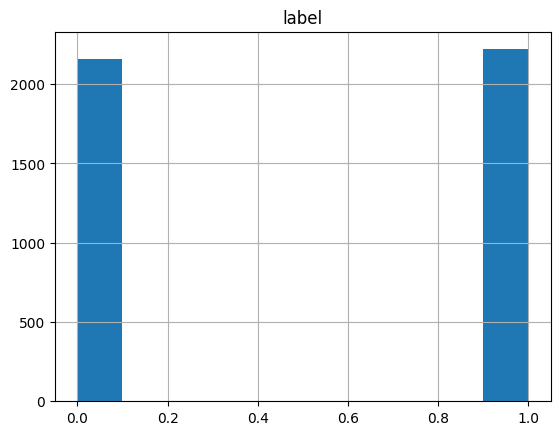

In [110]:
dt_train.hist()

array([[<Axes: title={'center': 'label'}>]], dtype=object)

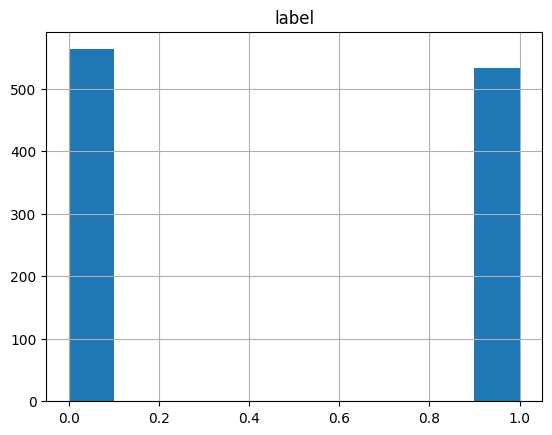

In [111]:
dt_test.hist()

In [112]:
# define model for classifier and initial weights
model_name = 'bert'
model_weights =  'bert-base-cased'

In [113]:
model = ClassificationModel(model_name, model_weights, num_labels=2, weight = [1 - sum(dt_train['label'])/len(dt_train['label']), sum(dt_train['label'])/len(dt_train['label'])], args={'reprocess_input_data': True, 'overwrite_output_dir': True,  'num_train_epochs' : 5}, use_cuda=True)
model.train_model(dt_train)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:611: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text an

  0%|          | 0/4380 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/548 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/548 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/548 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/548 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/548 [00:00<?, ?it/s]

(2740, 0.0798562836590961)

In [115]:
predictions, raw_out = model.predict(list(dt_test['text']))

  0%|          | 0/1096 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

In [116]:
print(classification_report(dt_test['label'], predictions, target_names = authors_names))

              precision    recall  f1-score   support

       Wilde       0.97      0.99      0.98       563
     Kipling       0.99      0.97      0.98       533

    accuracy                           0.98      1096
   macro avg       0.98      0.98      0.98      1096
weighted avg       0.98      0.98      0.98      1096



In [129]:
# save model to drive
model_save_name = 'BertClassifier(BERTAA)_balanced_data.pt'
path = f"./drive/My Drive/DL-ENS/{model_save_name}"
torch.save(model, path)

In [117]:
dt_james_path = f"{dir_data}/james_test.txt"
dt_jp = read_texts(dt_james_path,2)

In [118]:
predictions, raw_out = model.predict(list(dt_jp['text']))

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [119]:
sum(predictions)/len(predictions)

0.6111111111111112

In [131]:
dt_stoker_path = f"{dir_data}/stoker_test.txt"
dt_st = read_texts(dt_stoker_path,2)

In [132]:
predictions, raw_out = model.predict(list(dt_st['text']))

  0%|          | 0/364 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

In [133]:
sum(predictions)/len(predictions)

0.5824175824175825